## 1. Reducing childbed deaths analysis at 1847

In [1]:
import pandas as pd

yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


## 2. The alarming number of deaths
<p>The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an <em>alarming</em> number of women died as the result of childbirth, most of them from childbed fever.</p>
<p>We see this more clearly if we look at the <em>proportion of deaths</em> out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1.</p>

In [2]:
# Calculating proportion of deaths per no. births
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']
# Extract Clinic 1 data into clinic_1 and Clinic 2 data into clinic_2
clinic_1 = yearly[yearly['clinic'] == 'clinic 1']
clinic_2 = yearly[yearly['clinic'] == 'clinic 2']

print(clinic_1)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


## 3. Death at the clinics
<p>If we now plot the proportion of deaths at both Clinic 1 and Clinic 2  we'll see a curious pattern…</p>

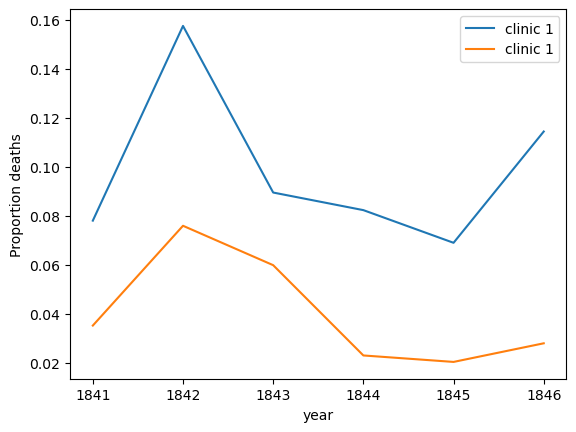

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting yearly proportion of deaths at the two clinics
ax = clinic_1.plot(x='year',y='proportion_deaths',label="clinic 1")
clinic_2.plot(x='year',y='proportion_deaths',label="clinic 1",ax=ax,ylabel='Proportion deaths')
plt.show()

## 4. The handwashing begins
<p>Why is the proportion of deaths consistently so much higher in Clinic 1? Dr.Semmelweis who built this dataset and conducted this analysis first time saw the same pattern. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses. </p>
<p>Semmelweis started to suspect that something on the corpses spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: <em>Wash your hands!</em> This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time. </p>
<p>Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.</p>

In [4]:
monthly = pd.read_csv('datasets/monthly_deaths.csv',parse_dates=['date'])

# Calculating proportion of deaths per no. births
monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]

print(monthly.head())

        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843


## 5. The effect of handwashing
<p>With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that it's obvious</p>

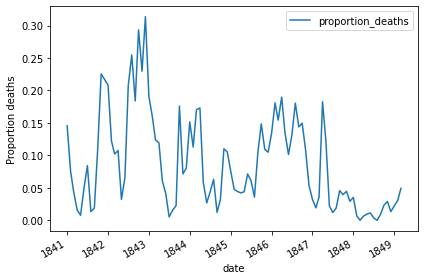

In [58]:
# Plotting monthly proportion of deaths
ax = monthly.plot(x='date',y='proportion_deaths',ylabel='Proportion deaths')
plt.show()

## 6. The effect of handwashing highlighted
<p>Starting from the summer of 1847 the proportion of deaths is drastically reduced and this was when Semmelweis made handwashing obligatory. </p>
<p>The effect of handwashing is made even more clear if we highlight this in the graph.</p>

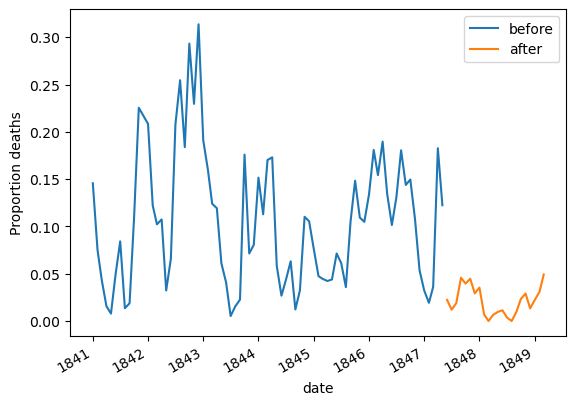

In [5]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Splitting monthly into before and after handwashing_start
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

# Plotting monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x='date',y='proportion_deaths',label='before')
after_washing.plot(x='date',y='proportion_deaths',label='after',ylabel='Proportion deaths',ax=ax)
plt.show()

## 7. More handwashing, fewer deaths?
<p>Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?</p>

In [6]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean() - before_proportion.mean() 
mean_diff

-0.0839566075118334

## 8. A Bootstrap analysis of Semmelweis handwashing data
<p>It reduced the proportion of deaths by around 8 percentage points! From 10% on average to just 2% (which is still a high number by modern standards). </p>
<p>To get a feeling for the uncertainty around how much handwashing reduces mortalities we could look at a confidence interval (here calculated using the bootstrap method).</p>

In [8]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1,replace=True)
    boot_after = after_proportion.sample(frac=1,replace=True)
    boot_mean_diff.append( boot_before.mean() - boot_after.mean()  )

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025,0.975])
confidence_interval

0.025    0.06695
0.975    0.10062
dtype: float64

## 9. Conclusion
As a conclusion,We are confident that handwashing reduced deaths due to childbed fever by 6% to 10% which is a significant change!!